In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_deeplab(input_shape):
    # Загрузка предварительно обученной модели Xception (без верхней части)
    base_model = tf.keras.applications.Xception(input_shape=input_shape, include_top=False)

    # Добавляем атрибуты для сегментации
    x = base_model.output
    x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
    x = layers.Dropout(0.5)(x)  # Слой Dropout для регуляризации

    # Добавляем слои для увеличения размера (Conv2DTranspose)
    x = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(x)

    # Выходной слой с 1 каналом для бинарной маски
    x = layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(x)

    model = models.Model(inputs=base_model.input, outputs=x)

    # Замораживаем все слои предварительно обученной модели (Xception) для ускорения обучения
    for layer in base_model.layers:
        layer.trainable = False

    return model


input_shape = (256, 256, 3)  # Размер входного изображения (256x256 пикселей с 3 каналами)
model = build_deeplab(input_shape)
model.summary()  # Выводим структуру модели


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 127, 127, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 127, 127, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 127, 127, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 125, 125, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 125, 125, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 125, 125, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 125, 125, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 125, 125, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 125, 125, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 125, 125, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 125, 125, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 63, 63, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 63, 63, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 28,530,985 (108.84 MB)

 Trainable params: 7,669,505 (29.26 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import os
from glob import glob

def load_data(dataset_path):
    images = sorted(glob(os.path.join(dataset_path, "images/*")))
    masks = sorted(glob(os.path.join(dataset_path, "masks/*")))
    return images, masks

def preprocess_image(image_path, mask_path, target_size=(256, 256)):
    # Чтение изображения и маски
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Нормализация изображения

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, target_size)
    mask = np.expand_dims(mask, axis=-1)  # Добавляем размерность канала

    return image, mask

def create_tf_dataset(images, masks, batch_size=8, target_size=(256, 256)):
    # Преобразуем изображения и маски в tf.data.Dataset
    def generator():
        for image_path, mask_path in zip(images, masks):
            yield preprocess_image(image_path, mask_path, target_size)

    dataset = tf.data.Dataset.from_generator(generator, (tf.float32, tf.float32))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhilroxtomar/person-segmentation")

print("Path to dataset files:", path)

100%|██████████| 461M/461M [00:26<00:00, 18.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nikhilroxtomar/person-segmentation/versions/1


In [4]:
pathData = '/root/.cache/kagglehub/datasets/nikhilroxtomar/person-segmentation/versions/1/people_segmentation'

In [5]:
import tensorflow as tf
import cv2
import numpy as np
from glob import glob

# Обновленный генератор для данных
def preprocess_image(image_path, mask_path, target_size=(256, 256)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Нормализация

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, target_size)
    mask = np.expand_dims(mask, axis=-1)  # Добавление канала для маски

    return image, mask

# Загрузка данных
def load_data(dataset_path):
    images = sorted(glob(os.path.join(dataset_path, "images/*")))
    masks = sorted(glob(os.path.join(dataset_path, "masks/*")))
    return images, masks

# Создание TensorFlow Dataset с явным указанием типов данных
def create_tf_dataset(images, masks, batch_size=8, target_size=(256, 256)):
    def generator():
        for image_path, mask_path in zip(images, masks):
            image, mask = preprocess_image(image_path, mask_path, target_size)
            yield image, mask  # Возвращаем корректные данные

    dataset = tf.data.Dataset.from_generator(
        generator,
        (tf.float32, tf.float32),  # Типы данных
        output_shapes=(tf.TensorShape([target_size[0], target_size[1], 3]), tf.TensorShape([target_size[0], target_size[1], 1]))  # Формы данных
    )
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# Путь к данным
dataset_path = pathData  # Путь к разархивированному датасету
images, masks = load_data(dataset_path)

# Создание train dataset
train_dataset = create_tf_dataset(images, masks, batch_size=8)

# Скомпилируем модель
model = build_deeplab(input_shape=(256, 256, 3))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("/content/deeplab_best_model.keras",
                                       save_best_only=True, monitor="loss", verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="loss", factor=0.1, patience=3, verbose=1)
]

# Обучение модели
history = model.fit(
    train_dataset,
    epochs=1,
    callbacks=callbacks,
    verbose=1
)


    710/Unknown 222s 276ms/step - accuracy: 0.8220 - loss: 0.4057
Epoch 1: loss improved from inf to 0.32494, saving model to /content/deeplab_best_model.keras


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


710/710 ━━━━━━━━━━━━━━━━━━━━ 229s 286ms/step - accuracy: 0.8221 - loss: 0.4056 - learning_rate: 1.0000e-04


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


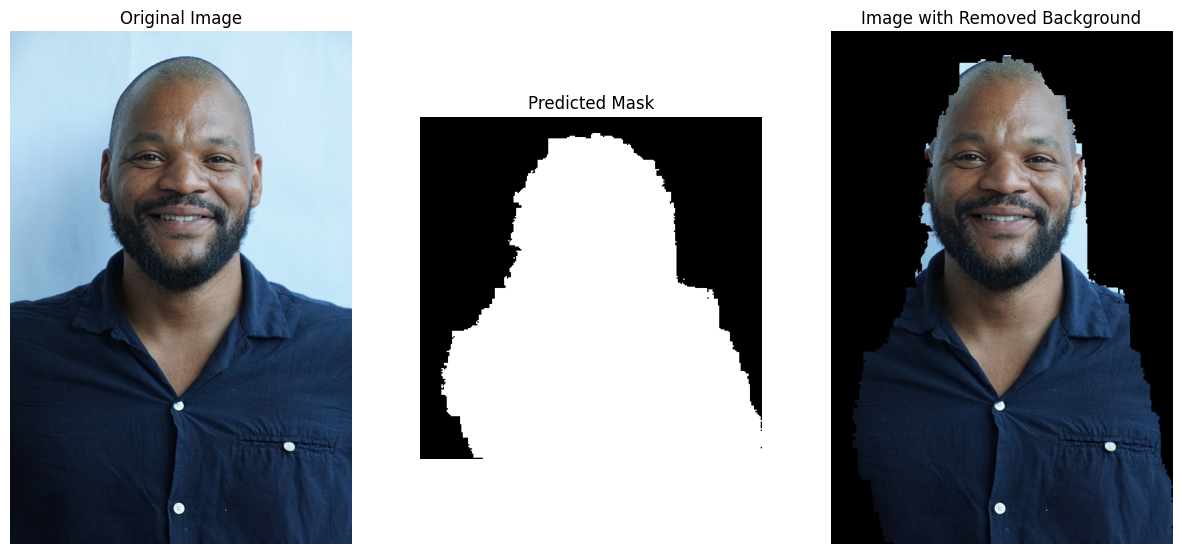

True

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2

# Функция для загрузки и предобработки изображения
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    # Загружаем изображение и преобразуем в нужный размер
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)  # Преобразуем в массив numpy
    img_array = np.expand_dims(img_array, axis=0)  # Добавляем размерность батча
    img_array = img_array / 255.0  # Нормализуем значение пикселей в диапазоне [0, 1]
    return img_array

# Функция для отображения изображения и его маски
def display_results(original_image_path, prediction, result_image):
    # Загружаем оригинальное изображение
    img = image.load_img(original_image_path)

    # Отображаем оригинальное изображение
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')

    # Отображаем предсказанную маску
    plt.subplot(1, 3, 2)
    plt.imshow(prediction.squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

    # Отображаем результат (изображение с удаленным фоном)
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title("Image with Removed Background")
    plt.axis('off')

    plt.show()

# Функция для удаления фона с изображения
def remove_background(img_path, model):
    # Загружаем и предобрабатываем изображение
    input_image = load_and_preprocess_image(img_path)

    # Получаем предсказание от модели
    prediction = model.predict(input_image)[0]  # Предсказание маски для одного изображения
    prediction = prediction > 0.5  # Применяем порог для бинаризации маски

    # Загружаем оригинальное изображение для восстановления исходных размеров
    original_image = cv2.imread(img_path)
    h, w, _ = original_image.shape

    # Изменяем размер маски до размера оригинала
    pred_mask_resized = cv2.resize(prediction.astype(np.uint8), (w, h))
    pred_mask_resized = np.expand_dims(pred_mask_resized, axis=-1)

    # Применяем маску к изображению (выделяем объект)
    result_image = original_image * pred_mask_resized

    return prediction, result_image

# Путь к изображению для тестирования
img_path = '/content/833499.jpg'

# Загрузка модели (укажите путь к вашей модели)
model = tf.keras.models.load_model("/content/deeplab_best_model.keras")

# Удаление фона с изображения
prediction, result_image = remove_background(img_path, model)

# Отображаем результаты
display_results(img_path, prediction, result_image)

# Сохраняем результат
output_path = 'result_image.png'
cv2.imwrite(output_path, result_image)


In [12]:
import numpy as np
import cv2
import tensorflow as tf
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import time

time_arr = []

# Путь к видео
video_path = '/content/1476204_People_1280x720.mp4'
output_path = './output_video_deepLabV3.avi'

# Загрузка модели
model = tf.keras.models.load_model("/content/deeplab_best_model.keras")

# Открытие видео для чтения
cap = cv2.VideoCapture(video_path)

# Параметры видео
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Создание объекта для записи выходного видео
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

if not cap.isOpened():
    print("Ошибка: Не удалось открыть видео.")
    cap.release()
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    original_image = frame
    h, w, _ = frame.shape

    # Начало замера времени
    start_time = time.time()

    # Предобработка кадра
    x = cv2.resize(frame, (256, 256))
    x = x / 255.0  # Нормализуем
    x = np.expand_dims(x, axis=0)  # Добавляем размерность для батча

    # Получаем предсказание маски
    pred_mask = model.predict(x)[0]
    pred_mask = cv2.resize(pred_mask, (w, h))  # Масштабируем маску до размера кадра
    pred_mask = np.expand_dims(pred_mask, axis=-1)  # Добавляем последнюю размерность
    pred_mask = pred_mask > 0.5  # Применяем порог для бинаризации

    # Создаем маску фона
    background_mask = np.abs(1 - pred_mask)

    # Применение маски к изображению
    masked_image = original_image * pred_mask  # Применяем маску

    # Создание фона для изображения (черный фон)
    background_mask = np.concatenate([background_mask, background_mask, background_mask], axis=-1)
    background_mask = background_mask * [0, 0, 0]

    # Комбинируем изображение и фон
    final_image = masked_image + background_mask

    # Преобразуем в формат uint8
    final_image = final_image.astype(np.uint8)

    # Запись обработанного кадра в выходное видео
    out.write(final_image)

    # Конец замера времени
    end_time = time.time()

    # Рассчитываем время обработки одного кадра
    frame_time = end_time - start_time
    time_arr.append(frame_time)

# Освобождение ресурсов
cap.release()
out.release()
print(f"Время обработки кадров в среднем: {(sum(time_arr) / len(time_arr)):.4f} секунд")
print(f"Общие время обработки: {sum(time_arr):.4f} секунд")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━